Importing necessary libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sales = pd.read_csv("C:/Users/works/Desktop/Tech stack/projects-20230901T120436Z-001/projects/BA/supermarket_sales - supermarket_sales.csv")

In [4]:
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# ----------------------------------------------------------------------------------------

By inspection, the 'Date' datatype is an object, we need to change it to datetime

In [6]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [7]:
sales['Date'].dtype

dtype('<M8[ns]')

In [8]:
type(sales['Date'])

pandas.core.series.Series

In [9]:
sales['day'] = (sales['Date']).dt.day
sales['month'] = (sales['Date']).dt.month
sales['year'] = (sales['Date']).dt.year

In [10]:
sales['Time'] = pd.to_datetime(sales['Time'])

C:\Users\works\AppData\Local\Temp\ipykernel_28820\721023929.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time'] = pd.to_datetime(sales['Time'])


In [11]:
sales['Hour'] = (sales['Time']).dt.hour 

In [12]:
sales['Hour'].nunique #unique hours

<bound method IndexOpsMixin.nunique of 0      13
1      10
2      13
3      20
4      10
       ..
995    13
996    17
997    13
998    15
999    13
Name: Hour, Length: 1000, dtype: int32>

In [13]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,2023-11-14 15:24:41.880000,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2023-11-14 10:00:00,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2023-11-14 12:43:00,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,2023-11-14 15:19:00,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,2023-11-14 18:15:00,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,2023-11-14 20:59:00,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000
std,26.494628,2.923431,11.708825,245.885335,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857


# ----------------------------------------------------------------------------------------

Let's find the number of unique values in columns with object datatype

In [14]:
categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [15]:
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [16]:
print("# unique values in Branch: {0}".format(len(sales['Branch'].unique().tolist())))
print("# unique values in City: {0}".format(len(sales['City'].unique().tolist())))
print("# unique values in Customer Type: {0}".format(len(sales['Customer type'].unique().tolist())))
print("# unique values in Gender: {0}".format(len(sales['Gender'].unique().tolist())))
print("# unique values in Product Line: {0}".format(len(sales['Product line'].unique().tolist())))
print("# unique values in Payment: {0}".format(len(sales['Payment'].unique().tolist())))

# unique values in Branch: 3
# unique values in City: 3
# unique values in Customer Type: 2
# unique values in Gender: 2
# unique values in Product Line: 6
# unique values in Payment: 3


# ----------------------------------------------------------------------------------------

Customer Segregation by gender

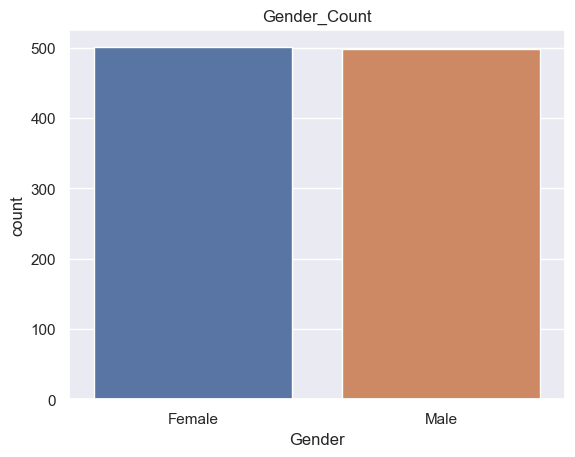

In [17]:
sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =sales).set_title("Gender_Count")

Ratio of Male/Female customers is almost 50-50.

# ---------------------------------------------------------------------------------------

### Rating by branch

Text(0.5, 1.0, 'Ratings by Branch')

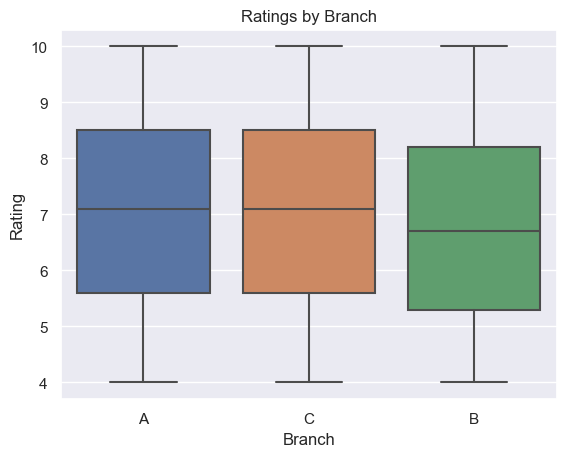

In [18]:
 sns.boxplot(x="Branch", y = "Rating" ,data =sales).set_title("Ratings by Branch") 

Branch A has the best performance. Branch C is in the middle almost at power with A. While, Branch B has the lowest rating among all the branches

# ---------------------------------------------------------------------------------------

### Mean Rating

C:\Users\works\AppData\Local\Temp\ipykernel_28820\948200661.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales['Rating'],kde=False)


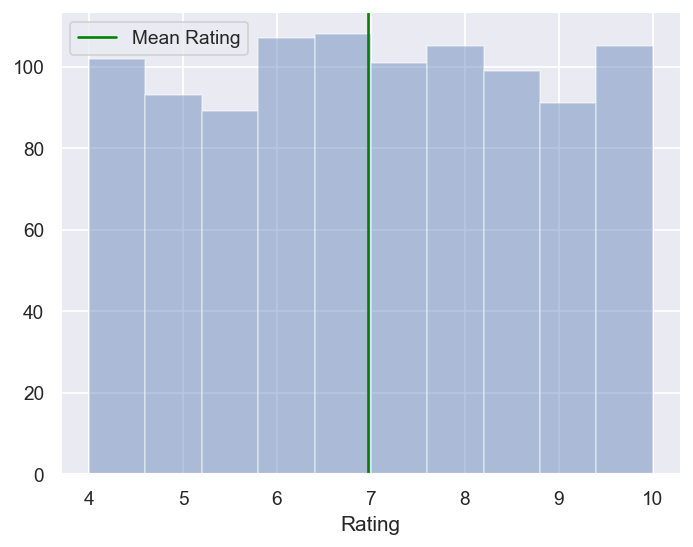

In [19]:
## Mean Rating
plt.figure(dpi=125)
sns.distplot(sales['Rating'],kde=False)
plt.axvline(x=np.mean(sales['Rating']),c='green',label='Mean Rating')
plt.legend()
plt.show()

Average rating of all the branches altogether is around 7. Which is a pretty decent rating and there is scope of improvement 

# ---------------------------------------------------------------------------------------

### Product sales per hour

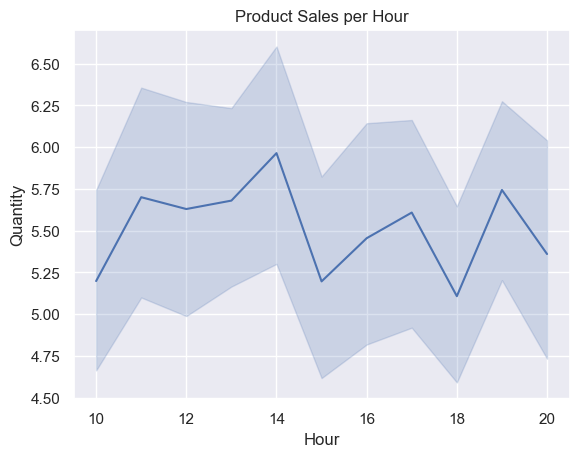

In [20]:
salesbyhour  = sns.lineplot(x="Hour",  y = 'Quantity',data =sales).set_title("Product Sales per Hour")

Sales by the hour in the comapny: Most of the item were sold around 14:00 hrs local time followed by 11:00 hrs and 19:00 hrs local time.

# ----------------------------------------------------------------------------------------

### Monthly Sales Comparison 

C:\Users\works\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


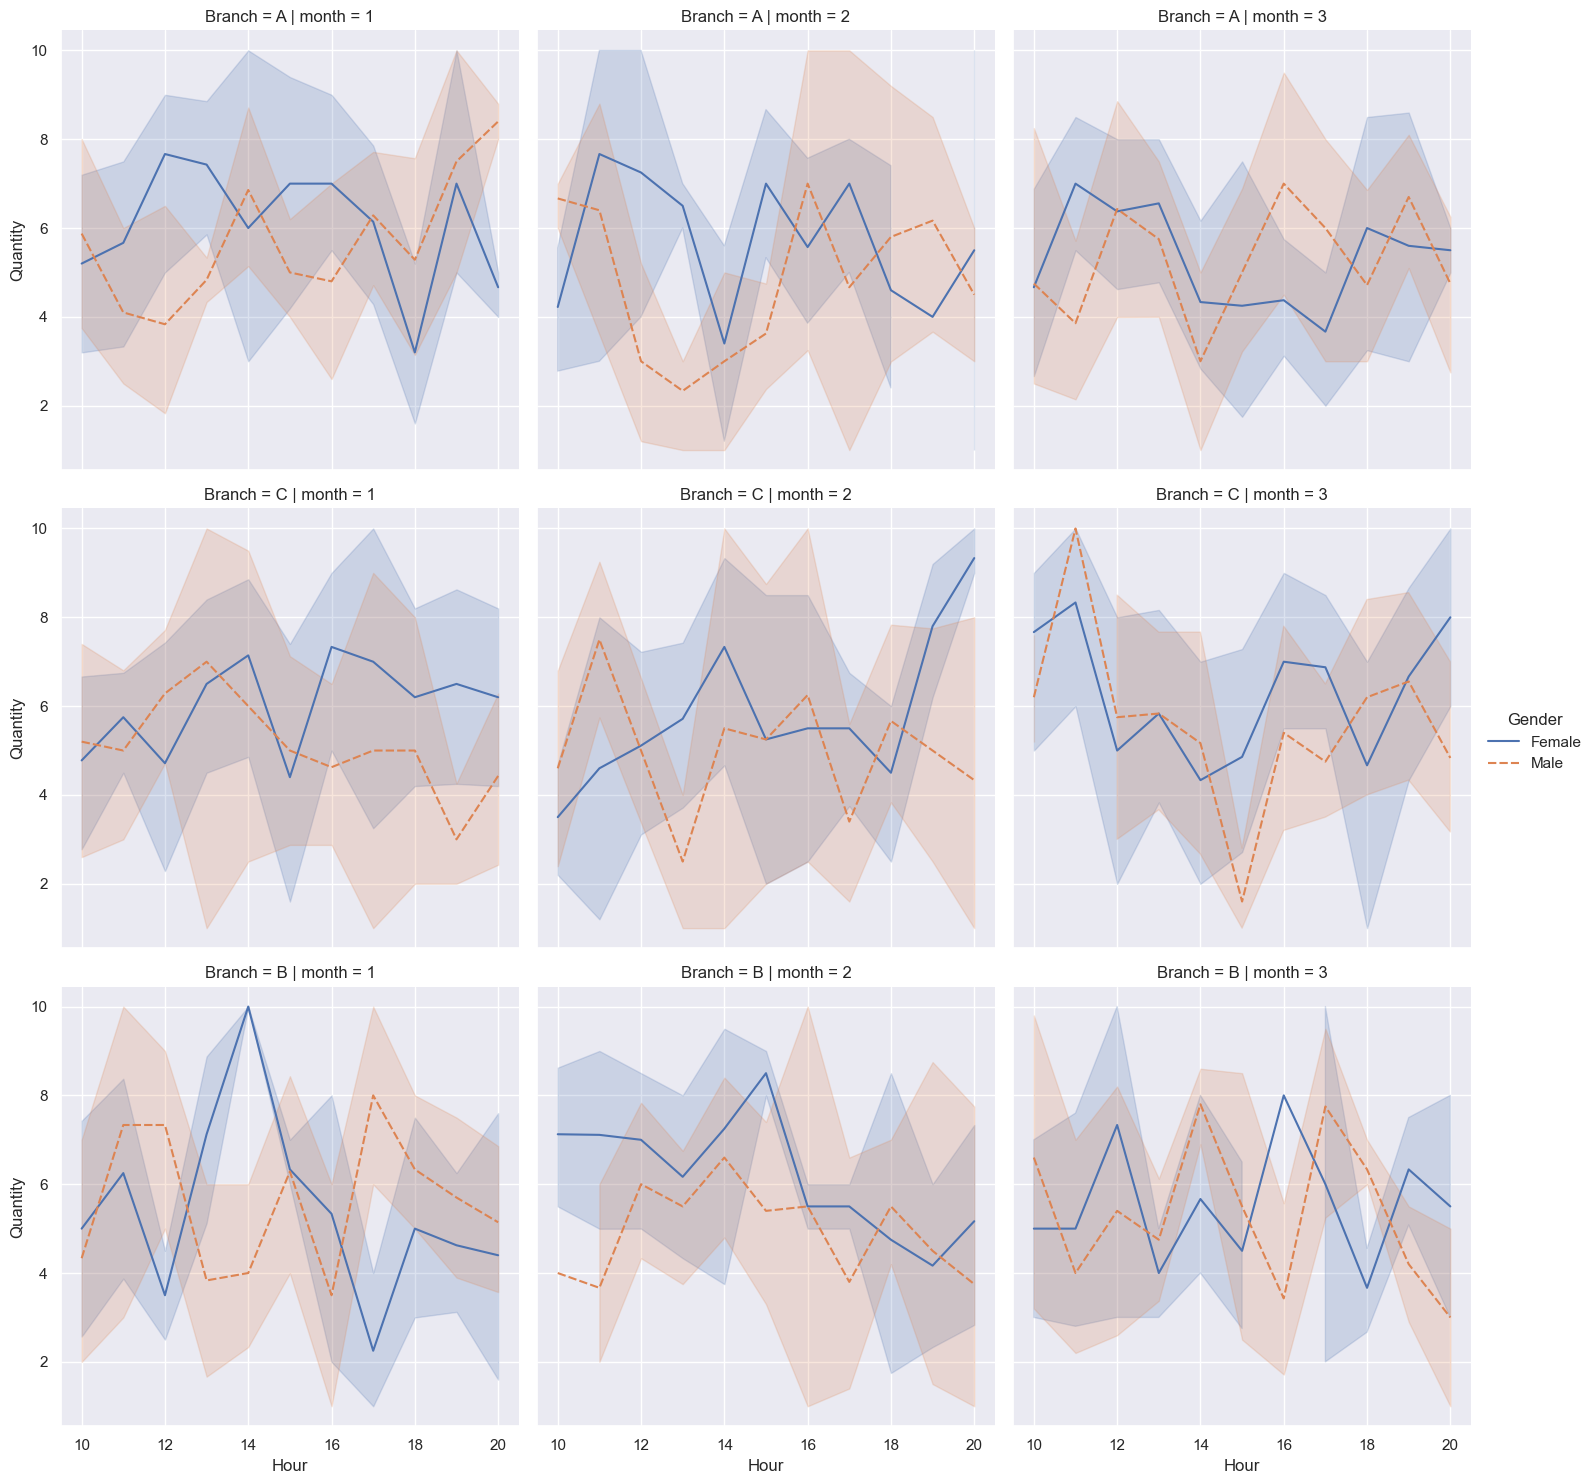

In [21]:
genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =sales)

In [22]:
sales['Rating'].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

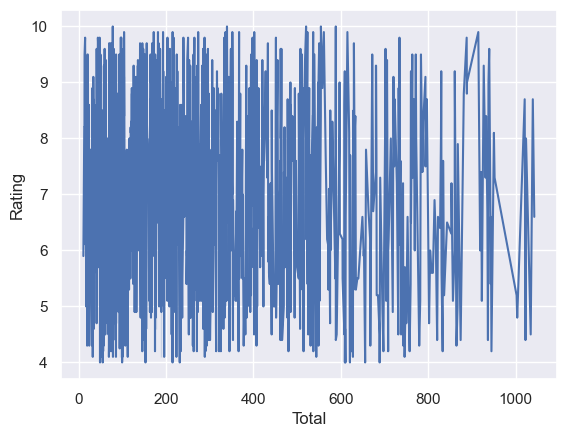

In [23]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =sales)

# ----------------------------------------------------------------------------------------

### Product analysis

Let's look at the various products' performance.

<Axes: xlabel='Quantity', ylabel='Product line'>

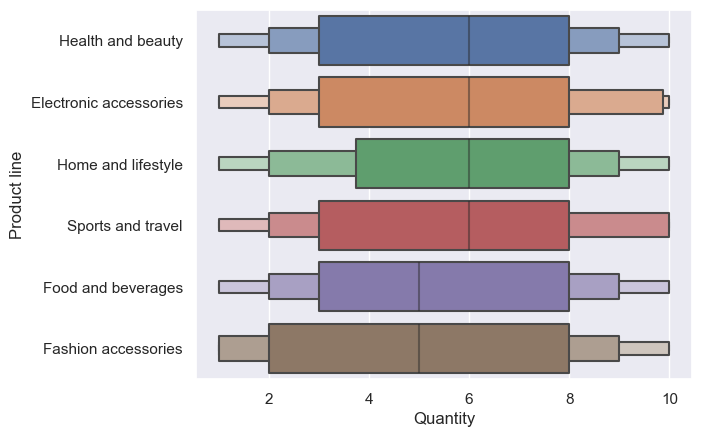

In [24]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=sales )

From the above visual: Health and Beauty,Electronic accessories, Home and lifestyle, Sports and travel have a better average quantity sales that Food and beverages as well as Fashion accessories.

<Axes: xlabel='count', ylabel='Product line'>

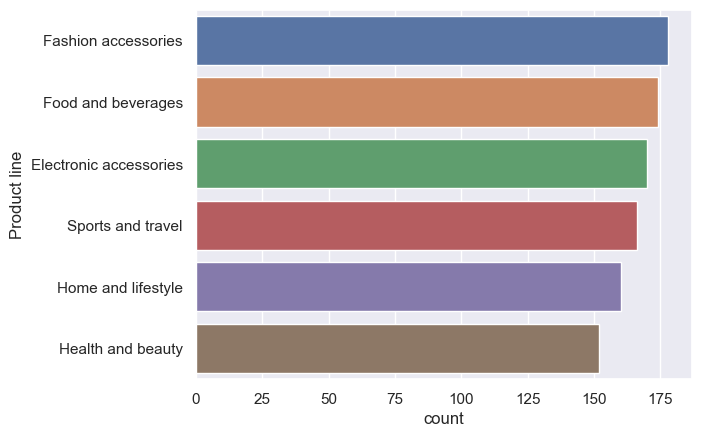

In [25]:
sns.countplot(y = 'Product line', data=sales, order = sales['Product line'].value_counts().index )

From the above image shows the top product line item type sold in the given dataset. Fashion Accessories is the highest while Health and beauty is the lowest.

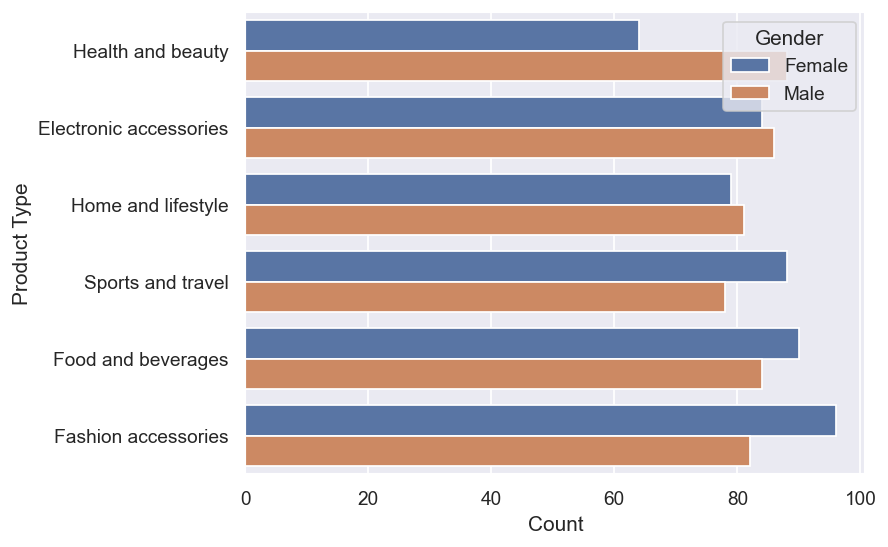

In [26]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Gender", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Well, In Health & Beauty, Males are much more than Females whereas in Fashion accessories , Food & beverages and Sports & Travel Females are more and in the rest there is not much significant difference.

# ---------------------------------------------------------------------------------------

### Total Product sales per category 

<Axes: xlabel='Total', ylabel='Product line'>

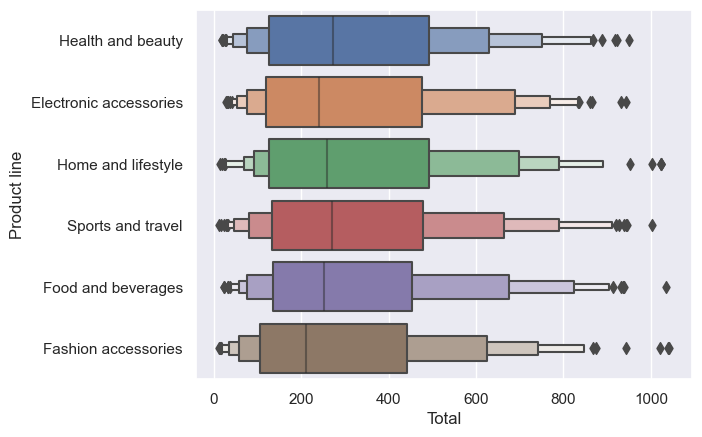

In [27]:
sns.boxenplot(y = 'Product line', x = 'Total', data=sales )

Fashion accessories & Electronics accessories have less sales as compared to other categories.

<Axes: xlabel='Total', ylabel='Product line'>

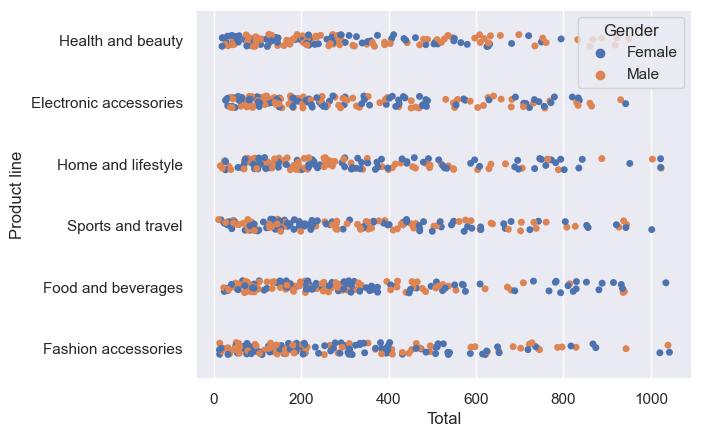

In [28]:
sns.stripplot(y = 'Product line', x = 'Total', hue = 'Gender', data=sales )

C:\Users\works\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


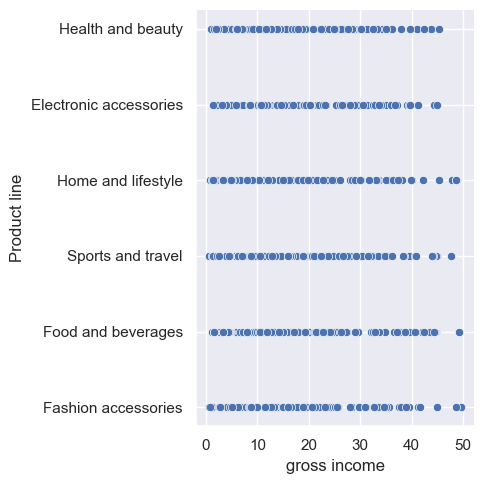

In [29]:
sns.relplot(y = 'Product line', x = 'gross income', data=sales )

### Rating per product category

<Axes: xlabel='Rating', ylabel='Product line'>

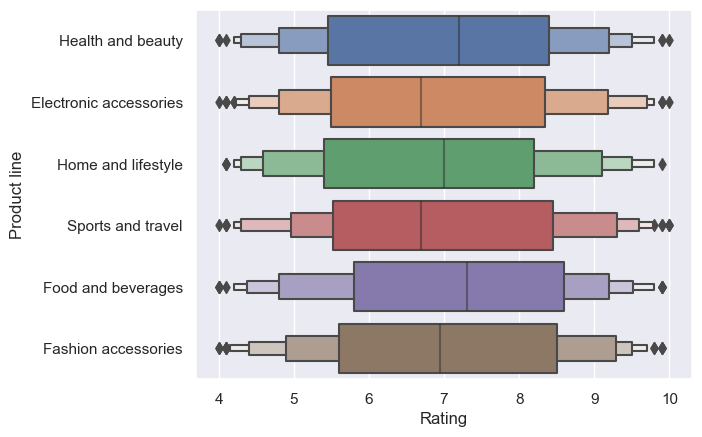

In [30]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=sales )

Food and Beverages have the highest average rating 

Home & lifestyle , Fashion accessories have mid ratings

While Sports and Travel & Electronic accesories the lowest.

# ----------------------------------------------------------------------------------------

Let's see when customers buy certain products in the various branches.

C:\Users\works\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


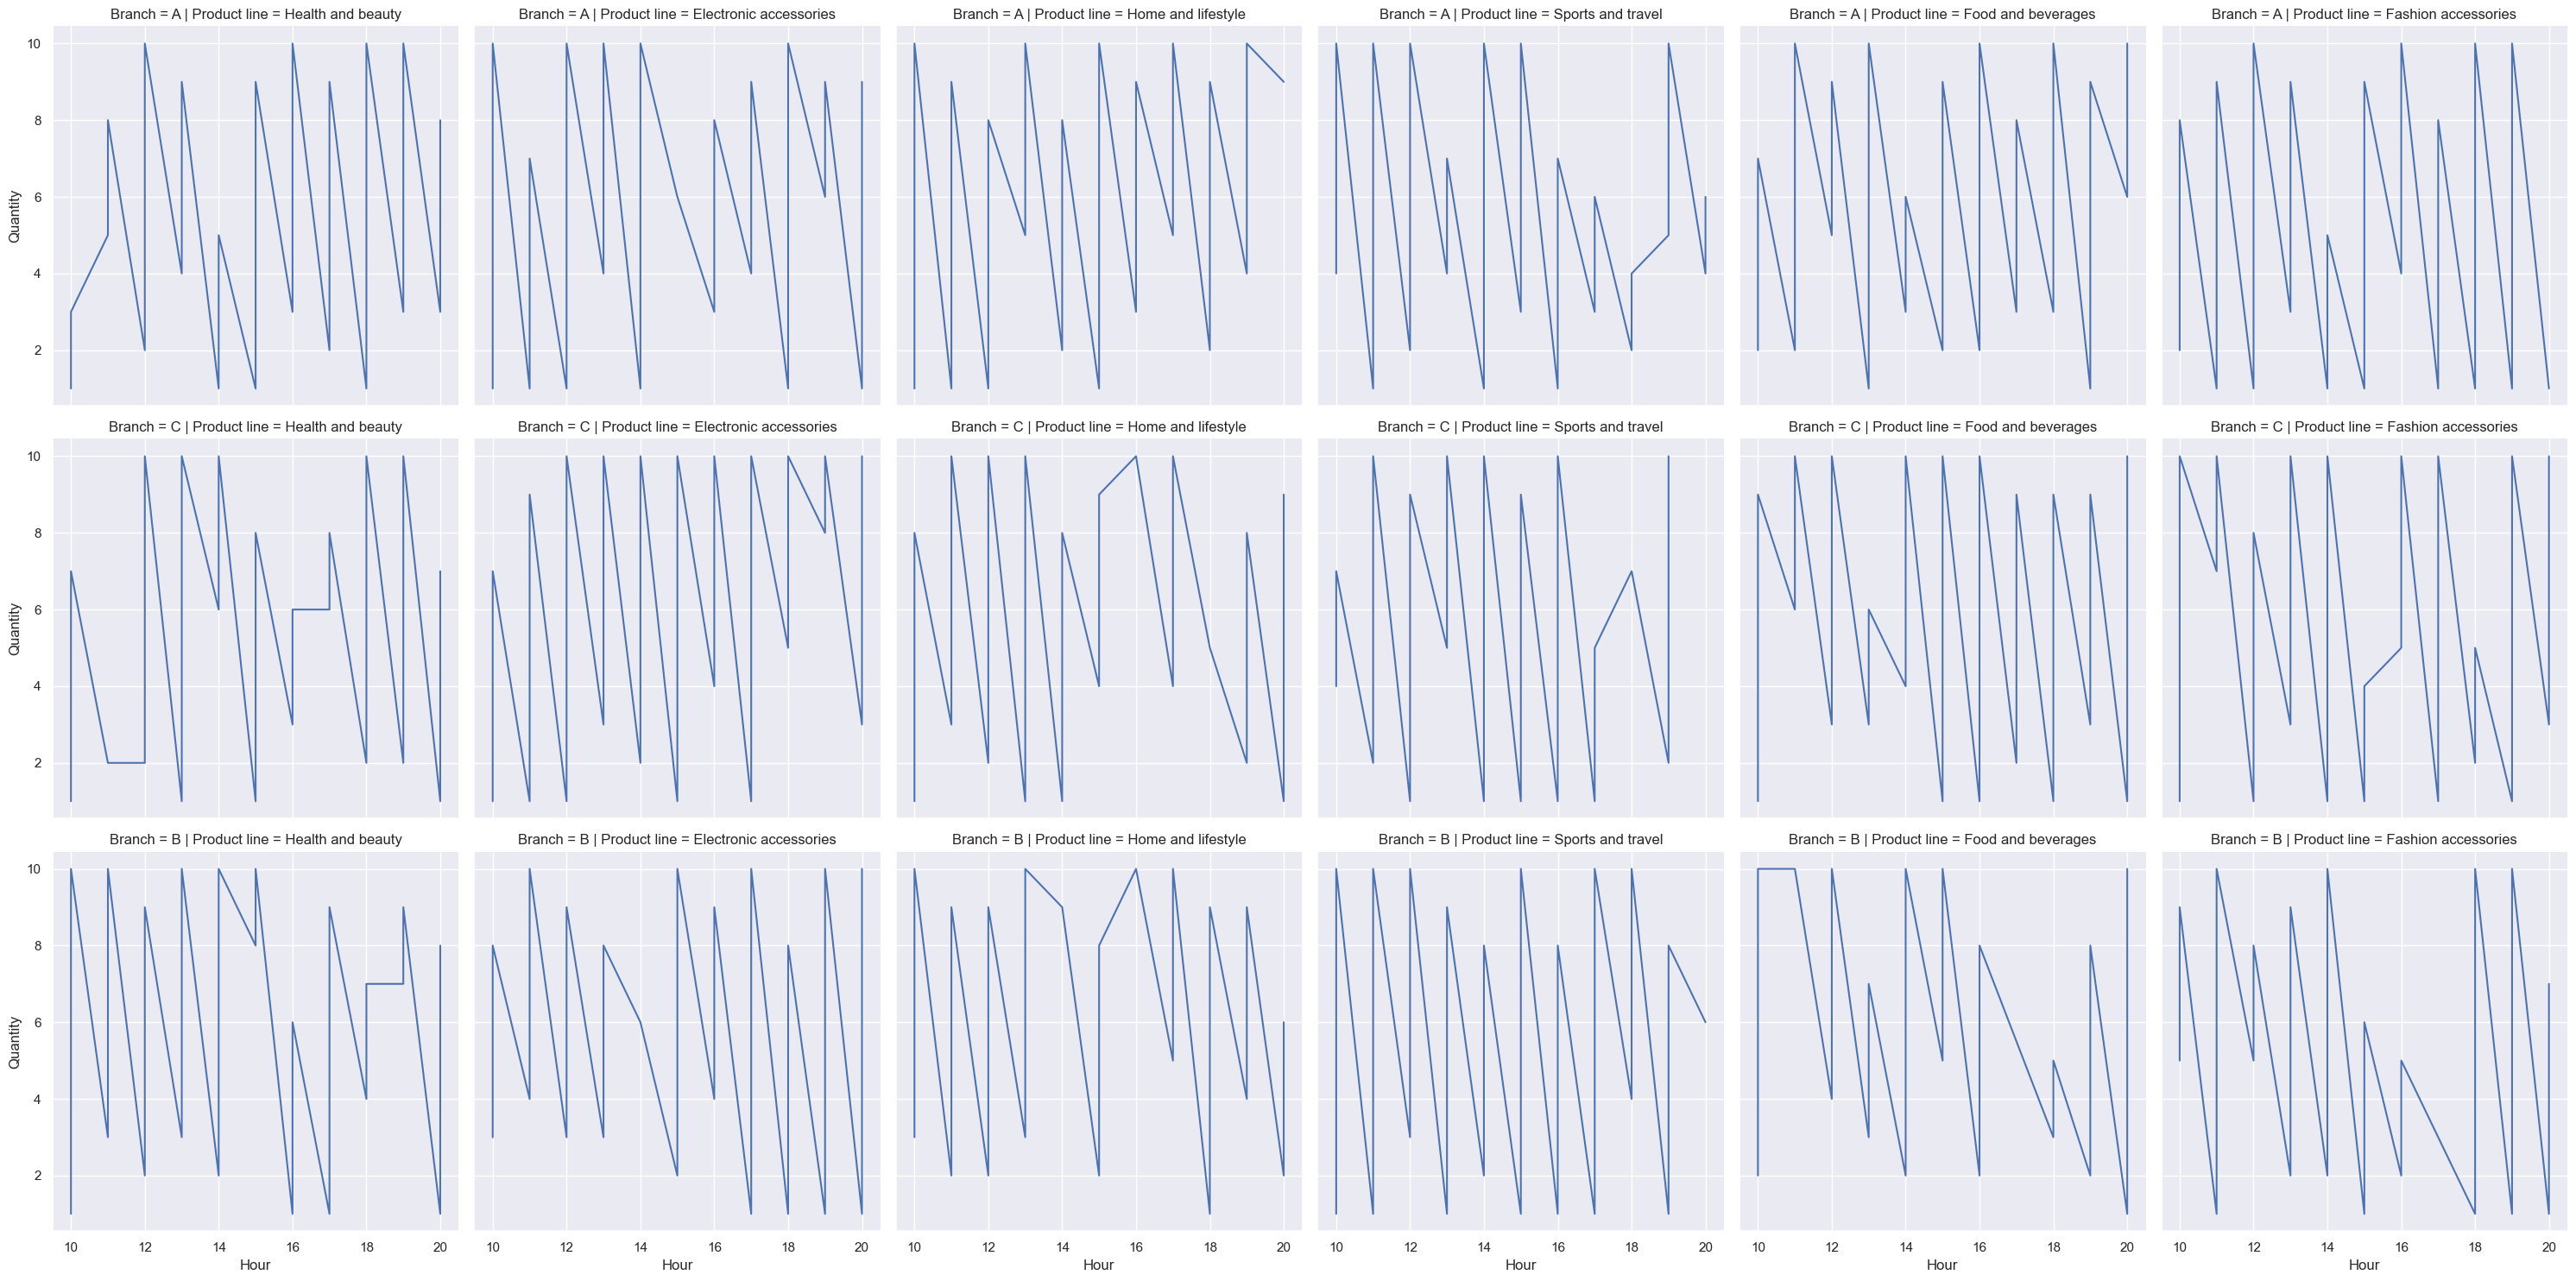

In [31]:
productCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =sales)

From the above plots, we can see that food and beverages sales usually high in all three branches at evening especially around 19:00

### Payment channel

Let see how customers make payment

Text(0.5, 1.0, 'Payment Channel')

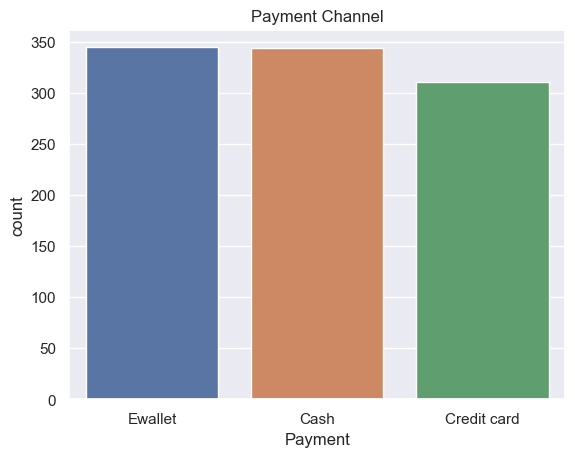

In [32]:
 sns.countplot(x="Payment", data =sales).set_title("Payment Channel") 

Most of the customers pay through the Ewallet and Cash Payment while under 40 percent of them pay with their credit card. We would also like to see this payment type distribution across all the branches

Text(0.5, 1.0, 'Payment Channel by Branch')

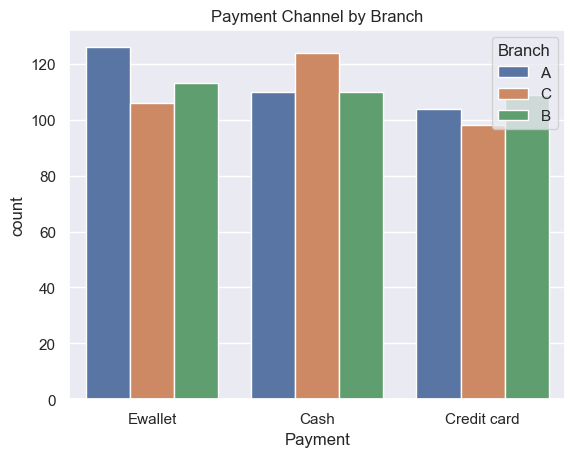

In [33]:
 sns.countplot(x="Payment", hue = "Branch", data =sales).set_title("Payment Channel by Branch") 

E-wallet payment is the most common in Branch A

Cash payment is the prefered in Branch C

Credit card is often used in Branch B

# ----------------------------------------------------------------------------------------

### Customer Analysis

There are two types of customers. Members and Normal. Let's see how many they are and where they are

In [34]:
sales['Customer type'].nunique()

2

Text(0.5, 1.0, 'Customer Type')

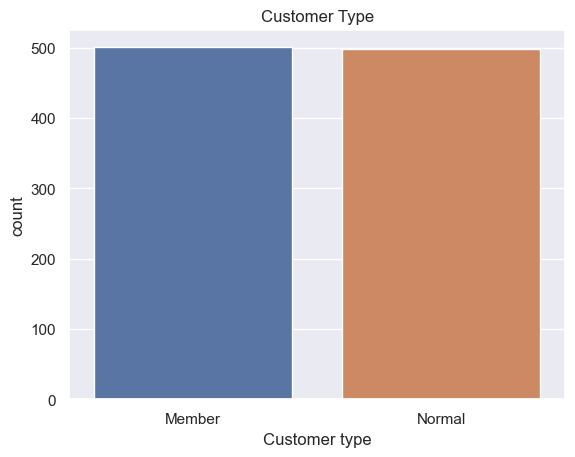

In [35]:
 sns.countplot(x="Customer type", data =sales).set_title("Customer Type") 

Text(0.5, 1.0, 'Customer Type by Branch')

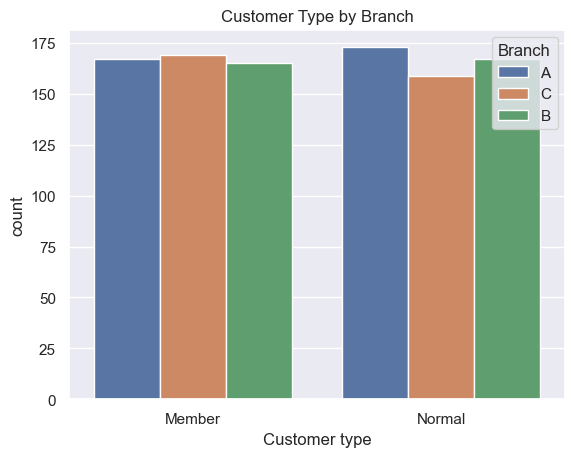

In [36]:
sns.countplot(x="Customer type", hue = "Branch", data =sales).set_title("Customer Type by Branch") 

In [37]:
sales.groupby(['Customer type']).agg({'Total': 'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<Axes: xlabel='Customer type', ylabel='Total'>

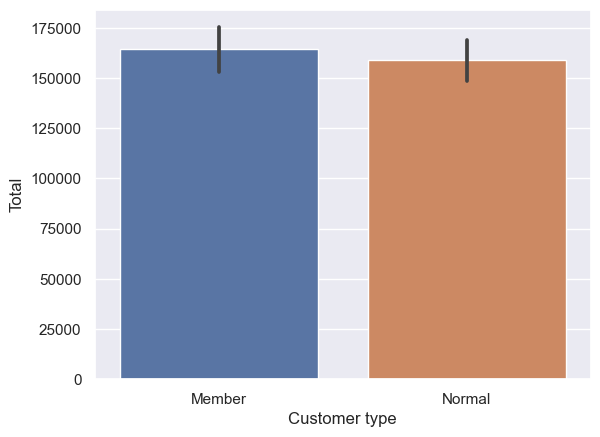

In [38]:
sns.barplot(x="Customer type", y="Total", estimator = sum, data=sales)

It can be observed that Members are spending more as compared to Normal Customers. Primarily because Members are more regular to shopping and often purchase in bulk. And they are obviously reaping benifits of their membership.

# ----------------------------------------------------------------------------------------

Customer Type and Rating 

Text(0.5, 1.0, 'Customer Type')

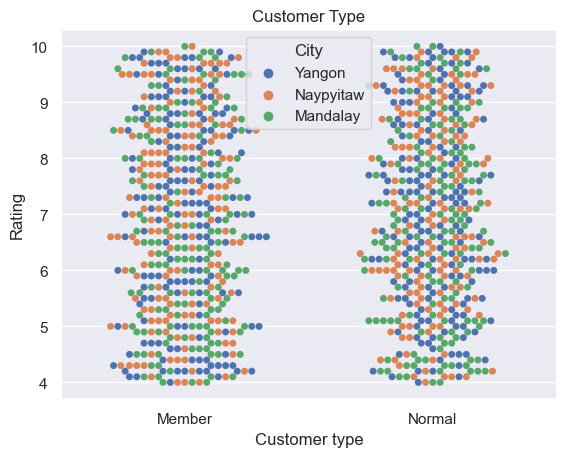

In [39]:
 sns.swarmplot(x="Customer type",  y = "Rating",  hue = "City", data =sales).set_title("Customer Type") 

Members have a better average rating

# ----------------------------------------------------------------------------------------

### Product performance w.r.t Branch

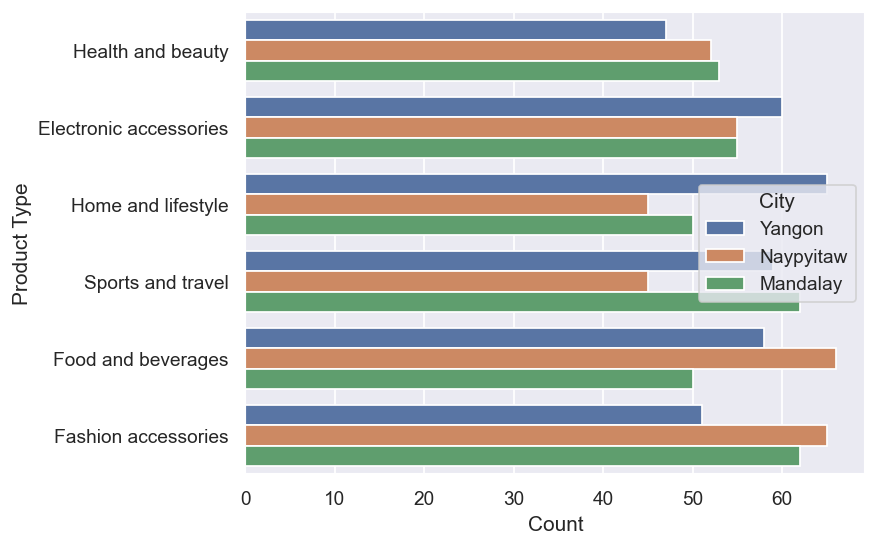

In [40]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = sales) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

Well, Yangon leads at Home & Lifestyle and Electronic accessories.

Naypyitaw leads at Food & Bevaerages and Fashion accessories.

Mandalay leads at Sports & Travel and Health & Beauty.

# ----------------------------------------------------------------------------------------

## Recommendations/Summary

Sales reach maximum at 11:00 hrs, 14:00 hrs and 17:hrs these timings are before work/lunch/after work hours. By offering special offers on Food & Beverages could help boost sales.


Fashion accesories suprisingly has low sales, new offers can be instilled to attract customers and clear up the stocked up inventory. If there is still no improvement the inflow of these goods should be reduced.


Ratings for Electronics accessories & Sports travel items are lowest(below 7). Product Quality check could be done for these segments. Accordingly if there are any issues the vendors for these segements could be reconsidered.


Members spend more as compared to normal customers and have given better ratings. Membership registration could be promoted on a higher rate as this would benefit overall sales and ratings as well.


For a more Customer centric improvement, The superstore can collect Customer feedback. This would help in improving the overall experience in a better and constructive way.





# ----------------------------------------------------------------------------------------

## Modelling 

In [41]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [42]:
X = sales['Total']
y = sales['Rating']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [44]:
X_train.shape

(600,)

In [45]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

Model fitting

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_test)

In [49]:
X_test[0:10]

array([[439.215 ],
       [497.07  ],
       [ 97.419 ],
       [277.788 ],
       [362.817 ],
       [290.43  ],
       [251.7165],
       [299.8485],
       [341.0925],
       [ 71.568 ]])

In [50]:
y_pred[0:10]

array([6.99781255, 6.98249208, 7.08832283, 7.04055969, 7.01804334,
       7.03721199, 7.04746363, 7.0347179 , 7.02379616, 7.09516838])

In [51]:
y_test[0:10]

890    7.2
694    7.6
798    9.8
147    5.6
858    5.1
446    8.9
634    5.0
127    5.9
812    6.5
438    7.0
Name: Rating, dtype: float64

In [52]:
x_range = [i for i in range(len(y_test))]

Prediction plots


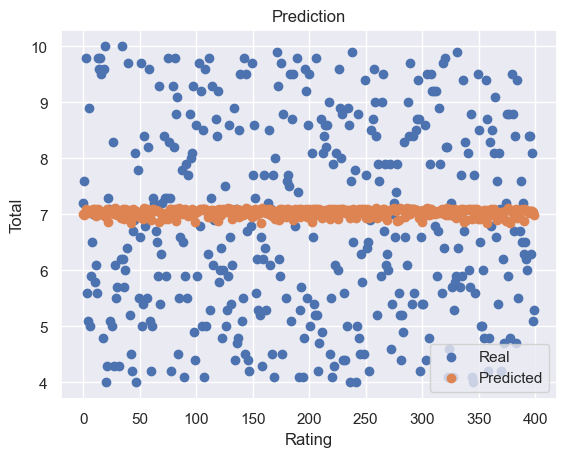

In [53]:
plt.scatter(x_range, y_test)
plt.scatter(x_range, y_pred)
plt.title('Prediction')
plt.xlabel('Rating')
plt.ylabel('Total')
plt.legend(["Real", "Predicted"])
plt.show()

Model Accuracy

In [54]:
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)

In [55]:
train_accuracy

0.0014645253113049206

In [56]:
test_accuracy

-0.005041221051066858

In [57]:
ms = mean_squared_error(y_test,y_pred)

In [58]:
rsq=r2_score(y_test,y_pred)

In [59]:
print('mean squared error :',ms)
print('r square :',rsq)

mean squared error : 3.0389793215760688
r square : -0.005041221051066858


In [60]:
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 7.114120156165543
Coefficient of the line: [-0.00026481]


In [61]:
import statsmodels.formula.api as smf

In [62]:
model = smf.ols(formula = 'Total ~ Rating', data = df)
result = model.fit()

NameError: name 'df' is not defined

In [ ]:
print(result.summary())

# ----------------------------------------------------------------------------------------

## Prediction for "Rating" w.r.t "Total"

In [ ]:
# this function takes "total as input and predicts the corresponnding rating"
def predict(x):
    a= lr.predict([[x]])
    return a

In [ ]:
predict(439.8)